In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from recommenders.utils.timer import Timer
from recommenders.datasets import movielens
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

In [16]:
df = movielens.load_pandas_df(
    size="100k",
    header=["userId", "movieId", "rating", "timestamp"]
)

df.head()

100%|██████████| 4.81k/4.81k [06:01<00:00, 13.3KB/s]


,userId,movieId,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [17]:
df = df[["userId", "movieId", "rating"]]

user_enc = LabelEncoder()
item_enc = LabelEncoder()
df["userId_enc"] = user_enc.fit_transform(df["userId"])
df["movieId_enc"] = item_enc.fit_transform(df["movieId"])

scaler = StandardScaler()
df[["userId_enc", "movieId_enc"]] = scaler.fit_transform(df[["userId_enc", "movieId_enc"]])

df.head()

,userId,movieId,rating,userId_enc,movieId_enc
0,196,242,3.0,-0.999519,-0.554812
1,186,302,3.0,-1.037026,-0.373432
2,22,377,1.0,-1.652150,-0.146707
3,244,51,2.0,-0.819482,-1.132206
4,166,346,1.0,-1.112041,-0.240420


In [11]:
# plt.figure(figsize=(8, 6))
# plt.scatter(df["userId_enc"], df["movieId_enc"], c=df["rating"], cmap="viridis", alpha=0.5)
# plt.colorbar(label="Rating")
# plt.xlabel("User (chuẩn hóa)")
# plt.ylabel("Movie (chuẩn hóa)")
# plt.title("Phân bố rating theo user và movie (chuẩn hóa)")
# plt.show()

In [18]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [22]:
X = df[["userId_enc", "movieId_enc"]]
y = df["rating"]

rmse_list = []
mae_list = []
mse_list = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=i
    )
    model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    
    print(f"Lan {i+1}: RMSE = {rmse:.4f} | MAE = {mae:.4f} | MSE = {mse:.4f}")

mean_rmse = np.mean(rmse_list)
mean_mae = np.mean(mae_list)
mean_mse = np.mean(mse_list)

print(f"\nTrung binh sau 10 lan:")
print(f"RMSE trung binh: {mean_rmse:.4f}")
print(f"MAE trung binh: {mean_mae:.4f}")
print(f"MSE trung binh: {mean_mse:.4f}")

Lan 1: RMSE = 1.0528 | MAE = 0.8443 | MSE = 1.1084
Lan 2: RMSE = 1.0600 | MAE = 0.8477 | MSE = 1.1236
Lan 3: RMSE = 1.0563 | MAE = 0.8480 | MSE = 1.1157
Lan 4: RMSE = 1.0528 | MAE = 0.8438 | MSE = 1.1085
Lan 5: RMSE = 1.0666 | MAE = 0.8545 | MSE = 1.1377
Lan 6: RMSE = 1.0588 | MAE = 0.8509 | MSE = 1.1211
Lan 7: RMSE = 1.0579 | MAE = 0.8489 | MSE = 1.1192
Lan 8: RMSE = 1.0504 | MAE = 0.8448 | MSE = 1.1034
Lan 9: RMSE = 1.0372 | MAE = 0.8297 | MSE = 1.0757
Lan 10: RMSE = 1.0540 | MAE = 0.8476 | MSE = 1.1110

Trung binh sau 10 lan:
RMSE trung binh: 1.0547
MAE trung binh: 0.8460
MSE trung binh: 1.1124


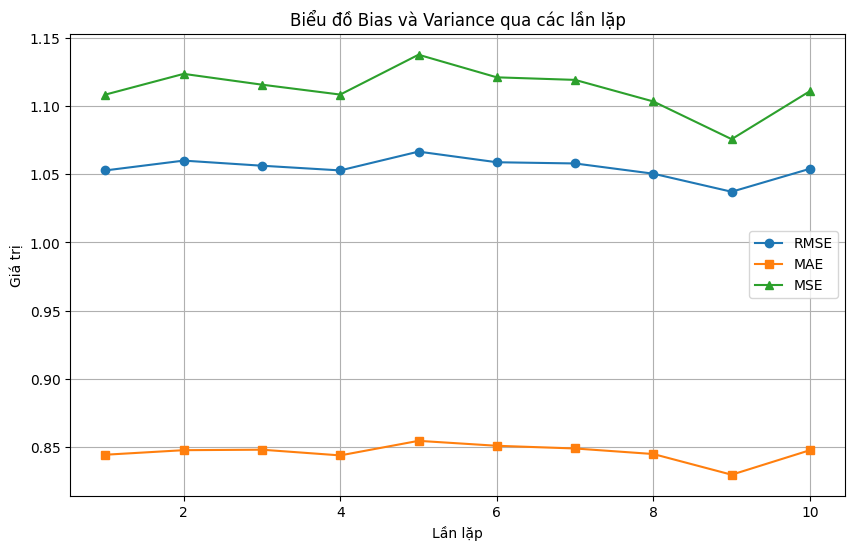

In [23]:
iterations = np.arange(1, 11)

plt.figure(figsize=(10, 6))
plt.plot(iterations, rmse_list, marker='o', label='RMSE')
plt.plot(iterations, mae_list, marker='s', label='MAE')
plt.plot(iterations, mse_list, marker='^', label='MSE')
plt.xlabel('Lần lặp')
plt.ylabel('Giá trị')
plt.title('Biểu đồ Bias và Variance qua các lần lặp')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Luu mo hinh thanh cong")

Luu mo hinh thanh cong
